# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [12]:
%store -r ndvi_da gdf ndvi_paths

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [13]:
# Import libraries

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import rioxarray as rxr
import xarray as xr

import earthpy
import glob
import hvplot.pandas
import hvplot.xarray

In [14]:
# check out the dataarray
ndvi_da.head()

<xarray.Dataset> Size: 636B
Dimensions:      (date: 5, y: 5, x: 5)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 40B -112.3 -112.3 -112.3 -112.3 -112.3
  * y            (y) float64 40B 33.39 33.39 33.38 33.38 33.38
    spatial_ref  int64 8B 0
  * date         (date) datetime64[ns] 40B 2001-01-14 2001-01-16 ... 2001-01-20
Data variables:
    NDVI         (date, y, x) float32 500B 0.8282 0.6146 ... 0.5887 0.5359

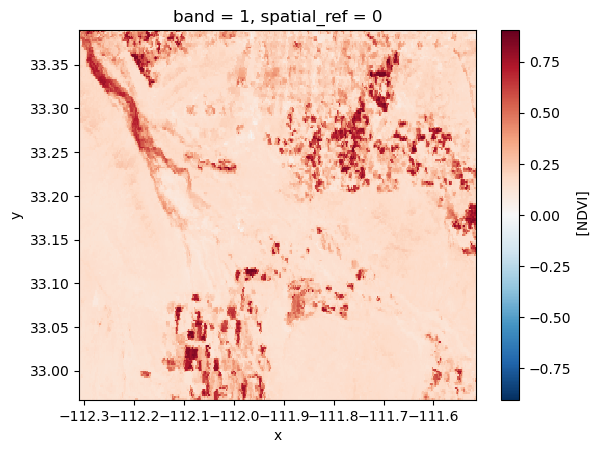

In [15]:
# Plot the first tif file

rxr.open_rasterio(ndvi_paths[0],mask_and_scale=True).squeeze().plot()

In [16]:
# Plot first and last tif files to visually compare

p_first = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).hvplot(x='x', y='y', cmap=plt.cm.PiYG, geo=True)
p_last = rxr.open_rasterio(ndvi_paths[153], mask_and_scale=True).hvplot(x='x', y='y', cmap=plt.cm.PiYG, geo=True)

(p_first + p_last)

BokehModel(combine_events=True, render_bundle={'docs_json': {'8f3018dd-0524-41cb-8047-b53e2e2530ff': {'version…

We can see that the second plot shows much less green in the upper right, and more green in the center. The upper right region is Phoenix, AZ, and then center is the Gila River Indian Community. It makes sense that Phoenix has lower NDVI 20 years later - likely increasing urbanization. And, we're expecting that NDVI would have gone up in GRIC after their water rights were returned.

# STEP 1: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

##### The text above says to select data from 2018-2020 and 2021-2023, but in class and on the website the years 2000-2012 and 2012-2020 were mentioned, so I've used that time period instead.

In [17]:
# Get NVDI from after decision

# Convert the dates to datetime format (I used chatGPT to help figure this out)
ndvi_da['date'] = pd.to_datetime(ndvi_da['date'].values, format='%Y-%m-%d')

# Select data from 2013-2020
ndvi_aft = ndvi_da.sel(date=ndvi_da['date'].dt.year.isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]))

# # Select data from 2021-2023
# ndvi_aft = ndvi_da.sel(date=ndvi_da['date'].dt.year.isin([2021, 2022, 2023]))


# Calculate the temporal mean
ndvi_mean_aft = ndvi_aft.mean(dim='date')
#ndvi_mean_aft.head()

# Get the NDVI variable

ndvi_post = ndvi_mean_aft['NDVI']
ndvi_post.head()


<xarray.DataArray 'NDVI' (y: 5, x: 5)> Size: 100B
array([[0.546416  , 0.4591072 , 0.46598926, 0.55016613, 0.59450704],
       [0.49288744, 0.42635176, 0.3559536 , 0.36948213, 0.36948213],
       [0.3264536 , 0.35112494, 0.39240363, 0.38003036, 0.38003036],
       [0.36866423, 0.40949994, 0.43003923, 0.43003923, 0.42122683],
       [0.34147143, 0.40175343, 0.4254839 , 0.4254839 , 0.39482138]],
      dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 40B -112.3 -112.3 -112.3 -112.3 -112.3
  * y            (y) float64 40B 33.39 33.39 33.38 33.38 33.38
    spatial_ref  int64 8B 0

In [18]:
# Get NDVI from before 2012 decision

# Select data from 2001-2012
ndvi_bef = ndvi_da.sel(date=ndvi_da['date'].dt.year.isin([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]))

# # Select data from 2021-2023
# ndvi_bef = ndvi_da.sel(date=ndvi_da['date'].dt.year.isin([2018, 2019, 2020]))

# Calculate the temporal mean
ndvi_mean_bef = ndvi_bef.mean(dim='date')
#ndvi_mean_bef.head()

# Get the NDVI variable

ndvi_pre = ndvi_mean_bef['NDVI']
ndvi_pre.head()


<xarray.DataArray 'NDVI' (y: 5, x: 5)> Size: 100B
array([[0.6308001 , 0.50946075, 0.45004645, 0.5274501 , 0.59461194],
       [0.5745987 , 0.47901076, 0.38816667, 0.4095524 , 0.4095524 ],
       [0.47425953, 0.4124929 , 0.3533666 , 0.3182869 , 0.3182869 ],
       [0.4748215 , 0.46896675, 0.42019886, 0.42019886, 0.3007738 ],
       [0.36725354, 0.44020247, 0.45961183, 0.45961183, 0.40731657]],
      dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 40B -112.3 -112.3 -112.3 -112.3 -112.3
  * y            (y) float64 40B 33.39 33.39 33.38 33.38 33.38
    spatial_ref  int64 8B 0

In [19]:
# Subtract before from after
ndvi_dif = ndvi_post - ndvi_pre
ndvi_dif.head()

<xarray.DataArray 'NDVI' (y: 5, x: 5)> Size: 100B
array([[-8.43841434e-02, -5.03535569e-02,  1.59428120e-02,
         2.27160454e-02, -1.04904175e-04],
       [-8.17112923e-02, -5.26590049e-02, -3.22130620e-02,
        -4.00702655e-02, -4.00702655e-02],
       [-1.47805929e-01, -6.13679588e-02,  3.90370190e-02,
         6.17434680e-02,  6.17434680e-02],
       [-1.06157273e-01, -5.94668090e-02,  9.84036922e-03,
         9.84036922e-03,  1.20453030e-01],
       [-2.57821083e-02, -3.84490490e-02, -3.41279209e-02,
        -3.41279209e-02, -1.24951899e-02]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 40B -112.3 -112.3 -112.3 -112.3 -112.3
  * y            (y) float64 40B 33.39 33.39 33.38 33.38 33.38
    spatial_ref  int64 8B 0

In [20]:
# Plot the difference
(
    ndvi_dif.hvplot(
        x='x', y='y', cmap=plt.cm.PiYG, geo=True, 
        title='Difference in NDVI after water rights return to GRIC')
    *
    gdf.hvplot(geo=True, fill_color=None, line_color='black')
)

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [21]:
%store ndvi_da ndvi_dif gdf

Stored 'ndvi_da' (Dataset)
Stored 'ndvi_dif' (DataArray)
Stored 'gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!